# EDA and Data Preprocessing

This notebook loads the raw complaints data, filters for specific products, cleans the data, and performs basic analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ensure data directories exist
os.makedirs('../data/processed', exist_ok=True)

In [2]:
# Load Data
print("Loading data...")
df = pd.read_csv('../data/raw/complaints.csv', low_memory=False)
print(f"Original shape: {df.shape}")

Loading data...


Original shape: (9609797, 18)


In [3]:
# Filter Products
target_products = [
    'Credit card',
    'Credit card or prepaid card',
    'Checking or savings account',
    'Money transfer, virtual currency, or money service',
    'Personal loan'
]
df_filtered = df[df['Product'].isin(target_products)].copy()
print(f"Filtered shape: {df_filtered.shape}")

Filtered shape: (869299, 18)


In [4]:
# Drop Missing Narratives
df_clean = df_filtered.dropna(subset=['Consumer complaint narrative'])
print(f"Cleaned shape: {df_clean.shape}")

Cleaned shape: (426841, 18)


C:\Users\hp\AppData\Local\Temp\ipykernel_12364\329838298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['word_count'] = df_clean['Consumer complaint narrative'].apply(lambda x: len(str(x).split()))


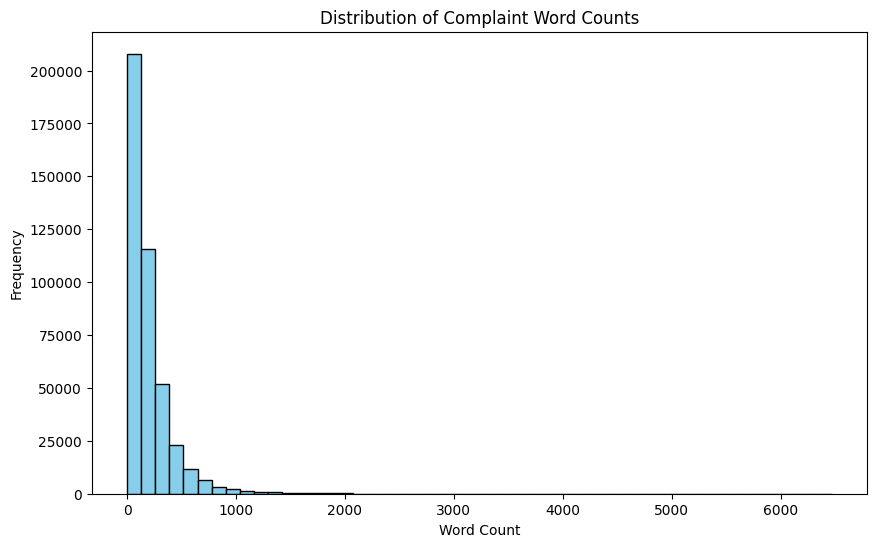

In [5]:
# Visualization: Word Counts
df_clean['word_count'] = df_clean['Consumer complaint narrative'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
plt.hist(df_clean['word_count'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Complaint Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Save Processed Data
output_path = '../data/processed/filtered_complaints.csv'
df_clean.to_csv(output_path, index=False)
print(f"Saved processing data to {output_path}")

Saved processing data to ../data/processed/filtered_complaints.csv
